# Preparing, Tidying, and Creating Informative Visualizations for Clean Tech Data
This notebook aims to take a dataset about clean tech and create meaningful visualizations out of it.
##### We will learn:
- How to read in data
- Prepare and tidy the dataset before conducting visualizations 
- Learn different visualization tools, such as matplotlib and Bokeh
- Compare and contrast the similarities and differences between different Python visualization libraries

In [3]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### What dataset are we using, exactly?
The dataset we will be using is about EVs (electric vehicles). Electric vehicles offer an alternative to traditional fossil fuel-powered vehicles, reducing greenhouse gas emissions and air pollution. Companies like Tesla, Nissan, and General Motors have developed electric vehicles that are becoming more accessible and popular among consumers. This dataset contains the population of EVs currently registered under the Washington State Department of Licensing (DOL).
<br>
This dataset could be useful if we wish to learn more about the distribution and trends of various different EVs and PHEVs. We can uncover which brands and makes are the most popular, the type of vehicle that they are, and their electric range.
<br>
If you would like to access this dataset from the source, you can find it here: https://catalog.data.gov/dataset/electric-vehicle-population-data

In [4]:
# Go into the data folder, and read in the csv dataset into the Python workspace. 
# Then, name that item "data".
data = pd.read_csv('../data/Electric_Vehicle_Population_Data.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


### Let's get a quick summary rundown of our EV data! This can be done using the ```.info()``` function. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

### What does the above summary tell us about our EV dataset?
- It contains 17 columns and 130443 rows.
- There are 3 float64 columns, 4 int64 columns, and 10 object columns.
- There are 8 columns with missing values. (County, City, Postal Code, Model, Legislative District, Vehicle Location, Electric Utility, 2020 Census Tract)

### Let's create a Pie Chart about the Different Types of EVs!
There are two types of EVs - battery EVs and plug-in EVs. Battery EVs are considered "pure" electric cars because they have a battery instead of a gasoline tank, and an electric motor instead of an internal combustion engine. Plug-in vehicles are actually a hybrid of both gasoline and pure electric cars. They have a combination of both gasoline and electric vehicles, containing a battery, an electric motor, a gasoline tank, and an internal combustion engine.
<br></br>
There are two ways of creating this pie chart. We will explore panda's method and then matplotlib's method.

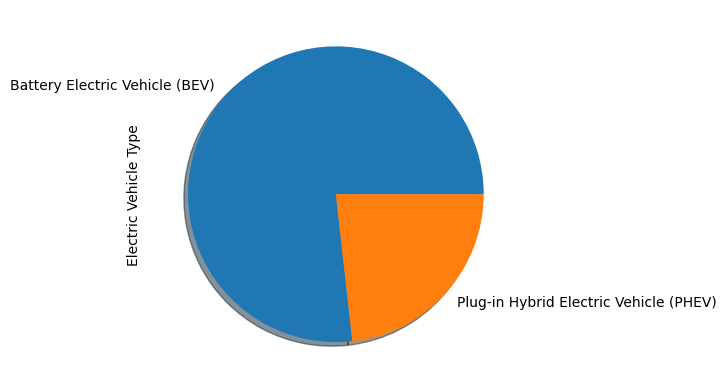

In [6]:
pieData = data['Electric Vehicle Type'].value_counts() # Only examining the 'Electric Vehicle Type' column, lets see how many instances there are of each Electric Vehicle Type.
# print(pieData)
plot = pieData.plot.pie(y='Electric Vehicle Type', shadow = True) # Create a pie chart, showing the distribution of the Electric Vehicle Type (we call that argument y).  

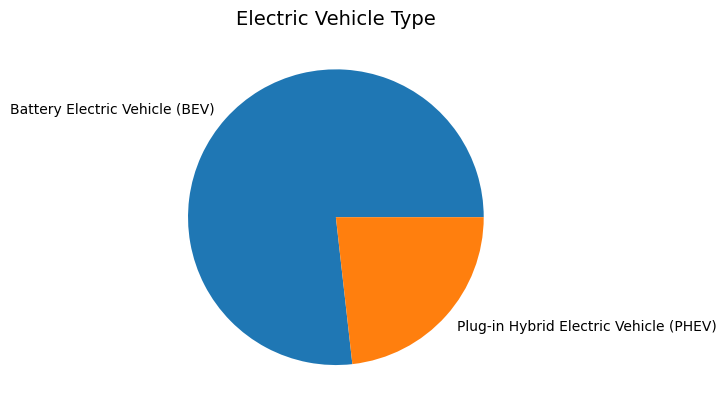

In [7]:
plt.pie(pieData.values , labels=pieData.index)
plt.title("Electric Vehicle Type", fontsize=14, loc="Center")
plt.show()

### Let's shift gears and analyze data about different brands!

In [8]:
brandData = data['Make'].value_counts() # Create a series from the 'Make' column, giving the number of occurences. 
brandData = brandData.loc[lambda x : x > 500] # Filter for brands where theres at least 500 vehicles
brandData
# plot = pieData.plot.pie(y='Brand') # uncomment this code to see pie distribution of different brands

TESLA            59629
NISSAN           13023
CHEVROLET        11251
FORD              6743
BMW               5696
KIA               5252
TOYOTA            4770
VOLKSWAGEN        3432
VOLVO             3113
AUDI              2622
JEEP              2328
HYUNDAI           2144
CHRYSLER          2139
RIVIAN            1612
PORSCHE            936
FIAT               803
HONDA              791
MINI               728
MERCEDES-BENZ      711
MITSUBISHI         710
POLESTAR           648
Name: Make, dtype: int64

In [9]:
# print(brandData.values)

While this series will suffice, its not very clear to read. For example, if we wanted to access the list of brands we would need to execute ```brandData.index```, and ```brandData.values``` for the amounts. 
<br>
Let's reorganize the series data into an easier to read dataframe!

In [10]:
brandDataframe = pd.DataFrame(brandData).reset_index() # Enables dataframe to be indexed by number, instead of brandData.index
brandDataframe.columns = ['Brand','Amount'] # Set column names to what we want
brandDataframe

,Brand,Amount
0,TESLA,59629
1,NISSAN,13023
2,CHEVROLET,11251
3,FORD,6743
4,BMW,5696
5,KIA,5252
6,TOYOTA,4770
7,VOLKSWAGEN,3432
8,VOLVO,3113
9,AUDI,2622


Now that we have a dataframe that's easy to read, let's create a visualization out of it!

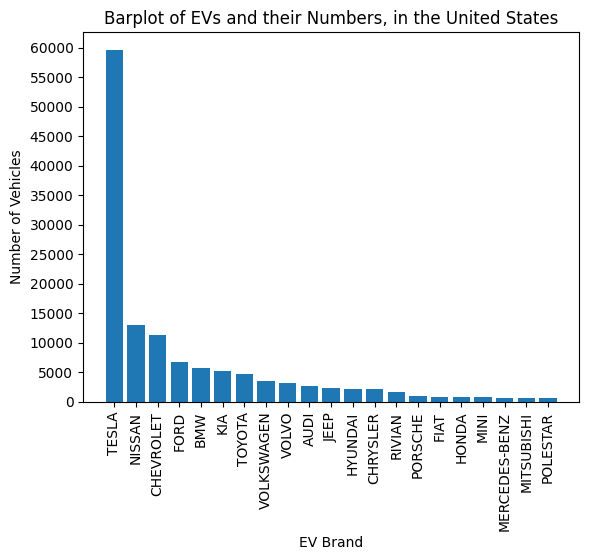

In [11]:
plt.bar(brandDataframe['Brand'], brandDataframe['Amount']) # Specify the type of visualization (bar), and specify the data that goes to the x and y axis (brand on x, amount on y)

plt.xticks(rotation=90) # Rotate x-axis labels 90 degrees
plt.yticks(np.arange(0 , brandDataframe["Amount"].max()+5000 , 5000)) # Specify the numberical labels along the y axis, along with the jump interval. We are skipping 5000 at a time.  

plt.title("Barplot of EVs and their Numbers, in the United States") # Title the visualization 
plt.xlabel("EV Brand") # Give the x axis a label
plt.ylabel("Number of Vehicles") # Give the y axis a label
plt.show()

As we can see, Tesla owns a large majority of EVs in the states. There is some compeition with Nissan and Chevrolet in the market.

### Let's say I'm a big Tesla fan and wanted to learn more about their vehicles through a pie chart.

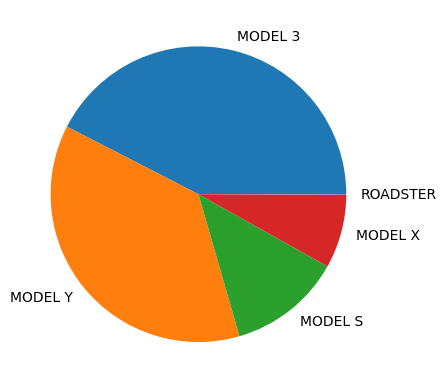

In [12]:
teslas = data[data["Make"]=='TESLA']["Model"]
# type(teslas)


plt.pie(teslas.value_counts() , labels=teslas.value_counts().index)
plt.show()

In [13]:
print(teslas.unique())
print(teslas.value_counts().index)

['MODEL X' 'MODEL 3' 'MODEL S' 'MODEL Y' 'ROADSTER']
Index(['MODEL 3', 'MODEL Y', 'MODEL S', 'MODEL X', 'ROADSTER'], dtype='object')


### Your turn! Anaylze the distribution of the model year each vehicle is under
Requirement: Model year must have at least 1000 vehicles

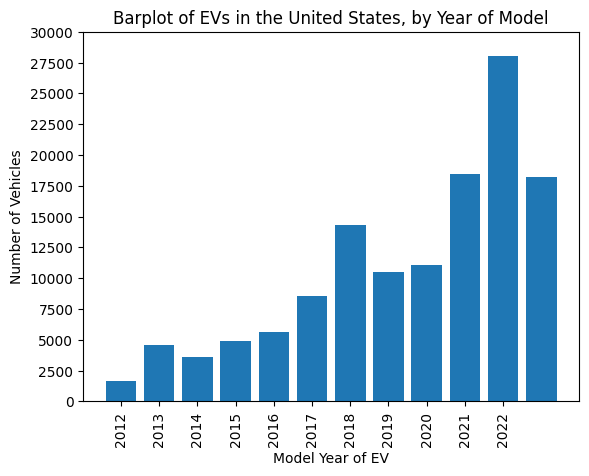

In [14]:
# Alternative to the lambda code below
# ans = modelYear.where(modelYear > 1000).dropna()


modelYear = data['Model Year'].value_counts().loc[lambda x : x > 1000]
modelYeardf = pd.DataFrame(modelYear).reset_index()
modelYeardf.columns = ['Model Year','Amount']
plt.bar(modelYeardf['Model Year'], modelYeardf['Amount'])

plt.xticks(rotation=90)
plt.xticks(np.arange(modelYeardf['Model Year'].min() , modelYeardf['Model Year'].max() , 1))
plt.yticks(np.arange(0 , modelYeardf["Amount"].max()+2500 , 2500))

plt.title("Barplot of EVs in the United States, by Year of Model")
plt.xlabel("Model Year of EV")
plt.ylabel("Number of Vehicles")
plt.show()

## Learning about Bokeh (another visualization module in Python)

In [17]:
pip install bokeh

  Using cached bokeh-3.2.0-py3-none-any.whl (7.8 MB)
     -------------------------------------- 151.7/151.7 kB 4.6 MB/s eta 0:00:00
  Using cached xyzservices-2023.5.0-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [19]:
brandDataframe.head()

,Brand,Amount
0,TESLA,59629
1,NISSAN,13023
2,CHEVROLET,11251
3,FORD,6743
4,BMW,5696


In [20]:
brands = brandDataframe['Brand']
amounts = brandDataframe['Amount']
source = {'brands':brands , 'amounts':amounts}

Some information regarding the ```figure``` function and its parameters:
 - `title`: The title of our visualization
 - `x_range`: The labels for each column on the x-axis
 - `y_range`: The upper and lower bounds for the y-axis
 - `x_axis_label`: The title of the x-axis
 - `y_axis_label`: The title of the y-axis
 - `plot_height`: Height of the visualization
 - `plot_width`: Width of the visualization

In [21]:
visual = figure(title="Barplot of EVs and their Numbers, in the United States", x_range=brands, y_range=(0,60000), 
                x_axis_label = "EV Brand", y_axis_label = "Number of Vehicles")

Now we can specify the type of plot that we want to use (vbar, or vertical bar). Here are some of ```vbar```'s arguments:
 - `x`: Specifies the x coordinates of the centers of the bars (x-axis data)
 - `top`: Specifies the top point of each bar (y-axis data)
 - `width`: Specifies the width of each bar
 - `legend_field`: Specifies the values that should be used for the legend
 - `source`: Specifies the source of the data (the dictionary created earlier)

In [22]:
visual.vbar(x='brands', top='amounts', width=0.7, legend_field='brands', source=source)

GlyphRenderer(id='p1041', ...)

In [23]:
show(visual)

In [24]:
import math

visual.xaxis.major_label_orientation = math.pi/2
visual.legend.visible=False

In [25]:
show(visual)

### Making our visualizations more informative with tooltips

In [26]:
from bokeh.models.tools import HoverTool

visual.add_tools(HoverTool(tooltips=[("Brand", "@brands"), ("Amount", "@amounts vehicles")]))

In [27]:
show(visual)

### Comparison of the same plot created using matplotlib:

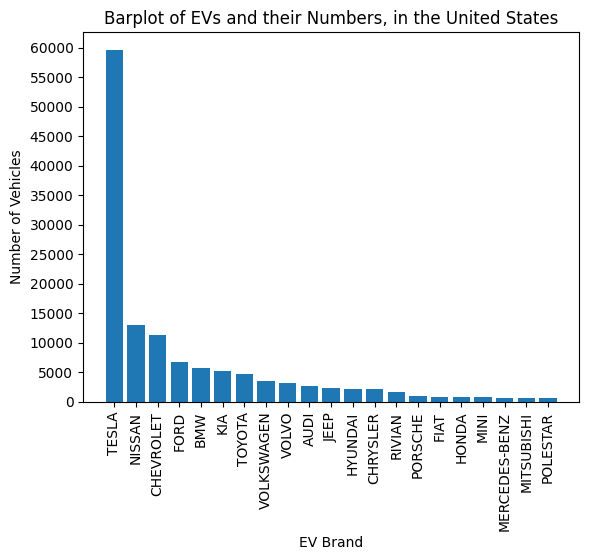

In [28]:
plt.bar(brandDataframe['Brand'], brandDataframe['Amount'])

plt.xticks(rotation=90)
plt.yticks(np.arange(0 , brandDataframe["Amount"].max()+5000 , 5000))

plt.title("Barplot of EVs and their Numbers, in the United States")
plt.xlabel("EV Brand")
plt.ylabel("Number of Vehicles")
plt.show()

### Some takeaways we can see from the comparison:

- Bokeh provides more interactive features than matplotlib (gives users the ability to box zoom, wheel zoom, pan figure, etc).
- Bokeh is also more customizable and has much more meaningful tools to better deliever information (one example could be tooltips, which makes reading the graph much easier)
- One benefit of using matplotlib is that the code syntax is easier to understand and the code is quicker to write as well. 